<h1> Box Plots with Seaborn </h1>

Box plots are a useful way <b>to visualize differences among different samples or groups</b>. They manage to provide a lot of statistical information, including — <ins>medians, ranges, and outliers</ins>.

<hr/>

<h2>Importing Seaborn, Matplotlib, Numpy, Pandas, and <a href=''>Dataset</a></h2>

For this section we'll be using <ins>[].csv</ins> from <a href=''>here</a></h2>.

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

churn = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\churn.csv')
churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr/>

<h2>EDA Processing</h2>

I will be following the `1.) Gather Insight, 2.) Clean Data, 3.) Analyze Relationships` process to improve this dataset's functionality and useability.  

<h3> Gather Insight </h3>

In [9]:
# Checking dataset volume (rows,cols)
churn.shape

(7043, 21)

In [10]:
# Checking for null values
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Checking column names:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Checking column datatypes:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Checking statistical significance
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<b>Insights Gained</b>:

* The 'SeniorCitizen' column values are confusing. May need to be normalized
* Lack of continuity in header names. May change to all lowercase
* Number format for the float64 & int64 columns may need a two-places format
* The 'monthlyCharges' standard deviation looks a little off. May need to address the outlier. 
* Can probably replace the index with customerID
* The 'Churn' column will create identity issues. Will rename to 'churn1'.

<h3>Clean Data</h3>

In [38]:
#Converting column names to lowercase: 
churn = churn.rename(columns=str.lower)

In [39]:
#Normalizing the 'seniorcitizen' values:
churn.seniorcitizen = churn.seniorcitizen.apply(lambda x: True if x == 1 else False)
churn.seniorcitizen.tail()

7038    False
7039    False
7040    False
7041     True
7042    False
Name: seniorcitizen, dtype: bool

In [43]:
#Changing number-specific columns to a two-deci format:
churn.style.format({ 'tenure': '{:,.2f}'.format, 'monthlycharges': '{:,.2f}'.format })
churn['monthlycharges'].head(5)

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: monthlycharges, dtype: float64

In [44]:
#Changing the index to customerid:
churn.set_index('customerid', inplace=True)
churn.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [46]:
#Renaming the 'churn' column to 'churn1':
churn.rename(columns={'churn':'churn1'}, inplace=True); churn.churn1.head()

customerid
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
Name: churn1, dtype: object

<h3>Analyze Relationships:</h3>

<h2>1. Box Plotting</h2>

The syntax `sns.boxplot()` is used to plot the statistical relevance of data with the minimum parameters of: `x | y | data`:

<b>Analyzing churn correlation to tenure</b>

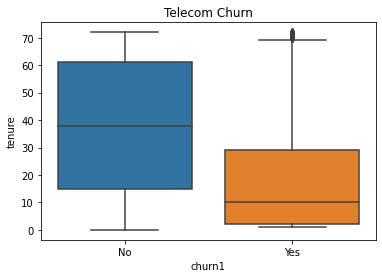

In [48]:
sns.boxplot(x='churn1', y='tenure', data=churn).set(title='Telecom Churn')
plt.show()

<b>Analyzing FOIS vs. Monthly Charges</b>

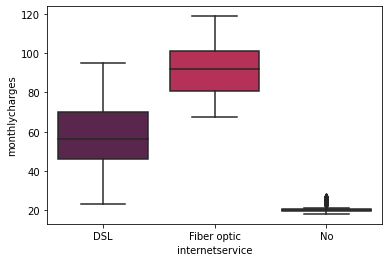

In [51]:
sns.boxplot(x='internetservice', y='monthlycharges',data=churn, palette='rocket')
plt.show()

<b>Analyzing Contract correlation to Tenure</b>

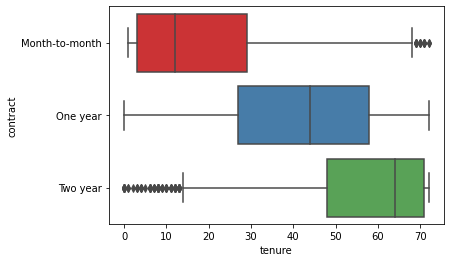

In [55]:
sns.boxplot(x='tenure',y='contract',data=churn, palette='Set1')
plt.show()

<ins><h3>Using <code>linewidth=</code> for Visual Clarity</h3></ins>

The <code>linewidth=</code> adds thickness to the boxplot lines:

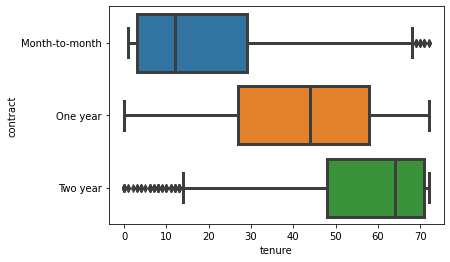

In [56]:
sns.boxplot(x='tenure',y='contract',data=churn,linewidth=3)
plt.show()

<h3> Using <code>order=</code> to reorder the plot presentation</h3>

Using `order=` allows you to place the presentation in any sequence you'd like.

<AxesSubplot:xlabel='tenure', ylabel='contract'>

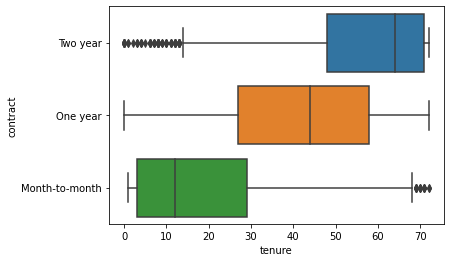

In [58]:
sns.boxplot(x='tenure',y='contract',data=churn, order=['Two year', 'One year', 'Month-to-month'])

<h3>Using `hue=` for extra analysis</h3>

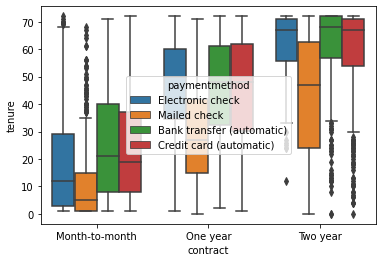

In [60]:
sns.boxplot(x='contract',y='tenure',data=churn, hue='paymentmethod')
plt.show()